## **Deep Learning**
In this section We will build a simple multilayer perceptron network(**MLP**) in TensorFlow

### Importing Dependencies

In [ ]:
# Lets import the required libraries
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [ ]:
import tensorflow as tf
tf.__version__

'2.18.0'

### **Load Dataset**
We will be using MNIST dataset of handwritten digits

Just run the cell below to load dataset

In [ ]:
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print("No. of training examples = ",x_train.shape[0])
print("Size of each image in dataset = ",x_train.shape[1:])
print("No. of test examples = ",x_test.shape[0])
print(y_train.shape[0])

No. of training examples =  60000
Size of each image in dataset =  (28, 28)
No. of test examples =  10000
60000


In [ ]:
y_train.shape[0]

60000

label: 9       0       8       1       7       

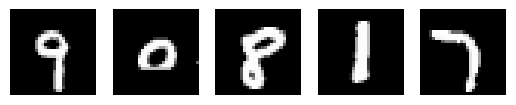

In [ ]:
# Run this cell to visualize some of the images from dataset

n = 5    # = no. of images to visualize

index = np.random.choice(x_train.shape[0],5)  # choose random index
print("label: ",end="")

for i,ind in enumerate(index):
    plt.subplot(1,n,i+1)
    plt.imshow(x_train[ind],cmap="gray")
    plt.axis("off")
    print(y_train[ind],end="       ")

plt.show()

#### Preprocess dataset
Since we are building a MLP model the input to the model should be a vector rather than a 28 by 28 matrix.

So your **First Task** is to flatten the images

(Hint: use *reshape()* method of arrays...)

Next, create validation dataset out of training dataset.

You can use 50K images for training and 10K for validation

In [ ]:
# Flatten the images into 1-d vectors

x_train_flatten = x_train.reshape(x_train.shape[0],-1)                                       # flatten the images of training set
x_test_flatten =x_test.reshape(x_test.shape[0],-1)                                        # flatten th eimages of test set


# Divide the training data into training and validation data....

n_validation = 10000                                        # choose number of images to be used for validation
#first 10,000 as validation and rest as training data
x_validation = x_train_flatten[:n_validation]
y_validation =y_test

x_train_flatten = x_train_flatten[n_validation:]
y_train = y_train[n_validation:]


In [ ]:
x_train_flatten.shape

(50000, 784)

In [ ]:
y_train.shape[0]

50000

### **Build a model**
You can choose whatever architechure you want, but ensure that it is **not too deep** as that will take too much time to train and **not too shallow** as that will give very low accuracy.

In [ ]:
num_classes=10
model = keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (5,5), padding='same', activation='relu', input_shape=(28,28, 1)),
    tf.keras.layers.Conv2D(32, (5,5), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(strides=(2,2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

# Make a graphical representation of the model...
keras.utils.plot_model(model,show_shapes=True)
model.summary

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


<bound method Model.summary of <Sequential name=sequential_5, built=True>>

#### Compile and Train
Choose an optimizer- method that minimizes loss function

**adam** optimizer is one of the popular choices. You should read about these online

In [ ]:
x_train_cnn_input = x_train_flatten.reshape(-1, 28, 28, 1)
x_validation_cnn_input = x_validation.reshape(-1, 28, 28, 1)

In [ ]:
model.compile(optimizer="Adam",loss = tf.keras.losses.SparseCategoricalCrossentropy(),metrics=["accuracy"])

n_epochs = 10              # set number of epochs
batch_size = 512            # you can tweak with these parametrs
history = model.fit(x_train_cnn_input,y_train,epochs=n_epochs,batch_size=batch_size,
                    validation_data=(x_validation_cnn_input,y_validation))

Epoch 1/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 329s 3s/step - accuracy: 0.2569 - loss: 4.6792 - val_accuracy: 0.0988 - val_loss: 7.3141
Epoch 2/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 372s 3s/step - accuracy: 0.8261 - loss: 0.5217 - val_accuracy: 0.0990 - val_loss: 11.0946
Epoch 3/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 327s 3s/step - accuracy: 0.9116 - loss: 0.2849 - val_accuracy: 0.0993 - val_loss: 14.1169
Epoch 4/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 323s 3s/step - accuracy: 0.9379 - loss: 0.2101 - val_accuracy: 0.0991 - val_loss: 15.3753
Epoch 5/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 326s 3s/step - accuracy: 0.9532 - loss: 0.1611 - val_accuracy: 0.0997 - val_loss: 15.2077
Epoch 6/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 377s 3s/step - accuracy: 0.9580 - loss: 0.1419 - val_accuracy: 0.0996 - val_loss: 16.0100
Epoch 7/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 321s 3s/step - accuracy: 0.9626 - loss: 0.1251 - val_accuracy: 0.0997 - val_loss: 15.7869
Epoch 8/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 314s 3s/step - accuracy: 0.9670 - loss: 0.1107 - val_accuracy: 0.10

### **Evaluate**
Evaluate your model on test data.

And Show some results

In [ ]:
x_test_cnn_input=x_test_flatten.reshape(-1,28,28,1)

20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 765ms/step - accuracy: 0.9895 - loss: 0.0340
Loss =  0.030291637405753136
Accuracy =  99.04000163078308 %


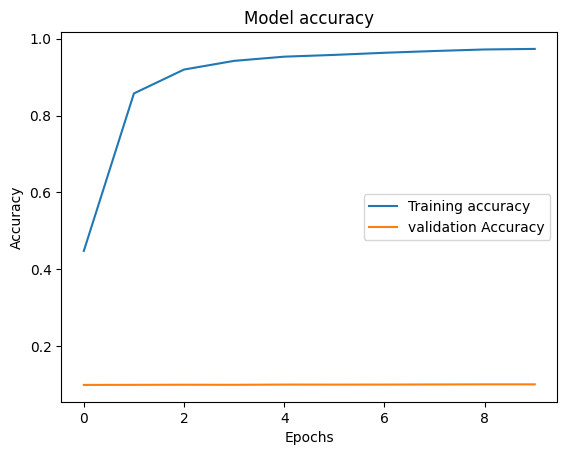

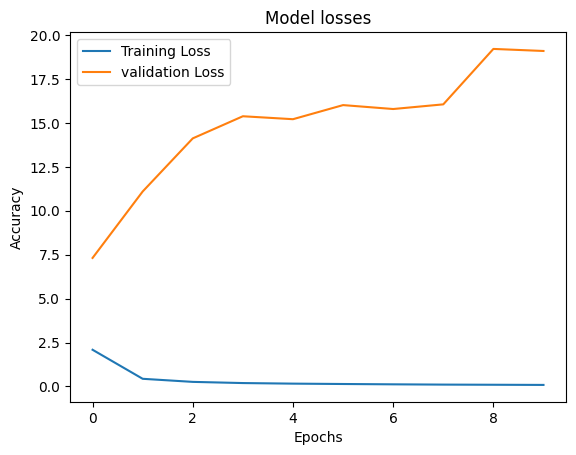

In [ ]:
results = model.evaluate(x_test_cnn_input,y_test,batch_size=batch_size)
print("Loss = ",results[0])
print("Accuracy = ",results[1]*100,"%")

# Plot Accuracy...
plt.plot(history.history['accuracy'], label="Training accuracy")
plt.plot(history.history['val_accuracy'], label="validation Accuracy")
plt.title("Model accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Similarly write code to plot loss...
plt.plot(history.history['loss'], label="Training Loss")
plt.plot(history.history['val_loss'], label="validation Loss")
plt.title("Model losses")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


Lets show our results on images from testing dataset

label: 
6      1      5      1      7      0      5      3      3      9      

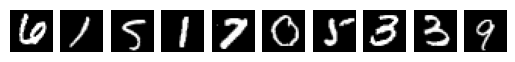

Predicted value: 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
9      

In [ ]:
n = 10   # = no. of images to see predictions on

index = np.random.choice(x_test_flatten.shape[0],n)  # choose random index from test data
print("label: ")

for i,ind in enumerate(index):
    plt.subplot(1,n,i+1)
    plt.imshow(x_test[ind],cmap="gray")             # fill code to show images from test set
    plt.axis("off")
    print(y_test[ind],end="      ")

plt.show()
print("Predicted value: ")

# Now lets print the predictions

for i,ind in enumerate(index):
    # write code to predict and print digit in image
    # Hint: the output of the model is a 10-d vector which gives probabilties
    # The digit in the image would be the class for which probability is hghest...
    prediction=model.predict(x_test_cnn_input[ind].reshape(1,28,28,1))
    digit = np.argmax(prediction)
    print(digit,end="      ")